In [1]:
import json
import pandas as pd
from datetime import datetime
import urllib
import nltk
#nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from collections import Counter
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [117]:
df=pd.read_csv("Twitter_TAS.csv",index_col=False)
df.head()

,Name,Date,Text,Retweet,Favorite
0,tableau,01-06-2020 03:30,On the blog: May's Developer Program highlight...,3,12
1,tableau,31-05-2020 21:31,"We all have biases, but how are these inherent...",8,29
2,tableau,30-05-2020 22:31,Looking for weekend plans? We've got you cover...,13,36
3,tableau,30-05-2020 04:30,Hear from our partners about what it means to ...,1,9
4,tableau,30-05-2020 02:30,We're making eight updates to the data set on ...,3,16


In [118]:
df['Date']=[pd.to_datetime(d,dayfirst=True) for d in df['Date']]
df['Date'] = [d.date() for d in df['Date']]
df.head()

,Name,Date,Text,Retweet,Favorite
0,tableau,2020-06-01,On the blog: May's Developer Program highlight...,3,12
1,tableau,2020-05-31,"We all have biases, but how are these inherent...",8,29
2,tableau,2020-05-30,Looking for weekend plans? We've got you cover...,13,36
3,tableau,2020-05-30,Hear from our partners about what it means to ...,1,9
4,tableau,2020-05-30,We're making eight updates to the data set on ...,3,16


In [119]:
df.to_csv("t.csv",index=False)
df=pd.read_csv("t.csv",index_col=False)
df.head()

,Name,Date,Text,Retweet,Favorite
0,tableau,2020-06-01,On the blog: May's Developer Program highlight...,3,12
1,tableau,2020-05-31,"We all have biases, but how are these inherent...",8,29
2,tableau,2020-05-30,Looking for weekend plans? We've got you cover...,13,36
3,tableau,2020-05-30,Hear from our partners about what it means to ...,1,9
4,tableau,2020-05-30,We're making eight updates to the data set on ...,3,16


In [ ]:
for i in range(len(df)):
    df['Date'][i] = datetime.strptime(df['Date'][i], '%Y-%m-%d').strftime("%Y-%m")
df.head()

In [121]:
dfl=df.groupby([df['Name'],df['Date']],as_index=False).count()
dfl.to_csv('Facebook_TbyMonth.csv',index=False)
dfl

,Name,Date,Text,Retweet,Favorite
0,SnowflakeDB,2020-01,132,132,132
1,SnowflakeDB,2020-02,52,52,52
2,SnowflakeDB,2020-03,59,59,59
3,SnowflakeDB,2020-04,91,91,91
4,SnowflakeDB,2020-05,108,108,108
5,SnowflakeDB,2020-06,8,8,8
6,alteryx,2020-01,76,95,95
7,alteryx,2020-02,158,166,166
8,alteryx,2020-03,104,106,106
9,alteryx,2020-04,135,137,137


In [13]:
df['date']=[datetime.fromtimestamp(d)for d in df['date']]
df.head(5)

,username,date,text,retweet,favorite,subjectivity
0,SethVogel3,2020-01-01 03:08:06,@Slalom @Slalom_SF,0,0,0.0
1,SethVogel3,2020-01-01 03:07:51,@Slalom @SlalomChicago #supplychain #lifesciences,0,0,0.0
2,SethVogel3,2020-01-01 03:07:38,@Slalom @SlalomChicago #DailyDose #healthcare ...,0,0,0.0
3,Slalom,2020-01-01 02:27:46,"Thank you for sharing your insights, Vik!",0,2,0.0
4,SlalomCanada,2020-01-01 01:41:24,@Slalom @SlalomCanada #leadership,0,0,0.0


In [28]:
df.head(10)

,username,date,text,retweet,favorite,subjectivity,name
0,interworks,0 2020-05-22\n1 2020-05-22\n2 ...,"If you're adept at #Tableau, you've likely mas...",0,0,0.800000,Interworks
1,InterWorksEU,0 2020-05-22\n1 2020-05-22\n2 ...,"Now on the blog, find out how to create custom...",0,0,0.500000,Interworks
2,interworks,0 2020-05-22\n1 2020-05-22\n2 ...,We're thrilled to team up with our partners ov...,0,1,0.575000,Interworks
3,InterWorksEU,0 2020-05-22\n1 2020-05-22\n2 ...,Now that @tableau and @salesforce have teamed ...,0,0,0.650000,Interworks
4,DangerandDread,0 2020-05-22\n1 2020-05-22\n2 ...,If I explained the interworks of the world Del...,0,2,0.750000,Interworks
5,InterWorksEU,0 2020-05-22\n1 2020-05-22\n2 ...,At InterWorks we know the stumbling blocks in ...,0,0,0.400000,Interworks
6,CesarPicco,0 2020-05-22\n1 2020-05-22\n2 ...,"Hey David, @interworks put one together years ...",0,3,0.000000,Interworks
7,interworks,0 2020-05-22\n1 2020-05-22\n2 ...,"In this #dataviz, Ben takes another look at th...",0,0,0.000000,Interworks
8,interworks,0 2020-05-22\n1 2020-05-22\n2 ...,"When it comes to #data, you're not alone. Inte...",0,1,0.000000,Interworks
9,interworks,0 2020-05-22\n1 2020-05-22\n2 ...,While you can spend hours customizing and clea...,0,3,0.372222,Interworks


In [7]:
df['new_date'] = [d.date() for d in df['date']]

In [8]:
df.head(10)

,username,date,text,retweet,favorite,subjectivity,new_date
0,SethVogel3,2020-01-01 03:08:06,@Slalom @Slalom_SF,0,0,0.0,2020-01-01
1,SethVogel3,2020-01-01 03:07:51,@Slalom @SlalomChicago #supplychain #lifesciences,0,0,0.0,2020-01-01
2,SethVogel3,2020-01-01 03:07:38,@Slalom @SlalomChicago #DailyDose #healthcare ...,0,0,0.0,2020-01-01
3,Slalom,2020-01-01 02:27:46,"Thank you for sharing your insights, Vik!",0,2,0.0,2020-01-01
4,SlalomCanada,2020-01-01 01:41:24,@Slalom @SlalomCanada #leadership,0,0,0.0,2020-01-01
5,crandall360,2019-12-31 23:27:02,@Slalom @SlalomChicago #2020trends #business,0,0,0.0,2019-12-31
6,SlalomChicago,2019-12-31 23:24:07,Connecting #VeevaCRM with Salesforce @marketin...,0,1,1.0,2019-12-31
7,crandall360,2019-12-31 22:05:07,@Slalom #CustomerInsight @SlalomChicago @Sales...,0,0,0.0,2019-12-31
8,gavanrobertday,2019-12-31 21:43:08,@Slalom #CustomerInsight @Salesforce https://d...,0,0,0.0,2019-12-31
9,carriesteyer,2019-12-31 21:35:21,What's coming for Einstein Analytics in the Sp...,0,3,0.0,2019-12-31


In [9]:
del df['date']
df.head()

,username,text,retweet,favorite,subjectivity,new_date
0,SethVogel3,@Slalom @Slalom_SF,0,0,0.0,2020-01-01
1,SethVogel3,@Slalom @SlalomChicago #supplychain #lifesciences,0,0,0.0,2020-01-01
2,SethVogel3,@Slalom @SlalomChicago #DailyDose #healthcare ...,0,0,0.0,2020-01-01
3,Slalom,"Thank you for sharing your insights, Vik!",0,2,0.0,2020-01-01
4,SlalomCanada,@Slalom @SlalomCanada #leadership,0,0,0.0,2020-01-01


In [14]:
df.to_csv("Slalomf.csv",index=False)

In [108]:
df=pd.read_csv("Facebook_TAS.csv",index_col=False)
df.head(10)
#len(df)

,Text,Date,Likes,Comments,Shares,Name
0,We're making some changes to the #COVID19 data...,2020-06-01,19,0,0,Tableau
1,"""🆀: [Question] Listen to #KnowBeforeYouNoodle ...",2020-05-29,10,0,0,Tableau
2,"The pandemic is constantly evolving, and organ...",2020-05-26,10,0,0,Tableau
3,"""🆀: How are data relationship different from j...",2020-05-22,19,0,2,Tableau
4,"""Regardless of where organizations are in thei...",2020-05-21,14,0,0,Tableau
5,"Today, alongside Mulesoft and Salesforce, we'r...",2020-05-20,12,0,0,Tableau
6,"Hear from Barry Chaiken, MD, MPH, Clinical Lea...",2020-05-19,6,0,0,Tableau
7,🆀: Why is level of detail important? Watch #Kn...,2020-05-15,17,0,0,Tableau
8,"From the start of the pandemic, our partners h...",2020-05-15,32,0,0,Tableau
9,Introducing #DataKids! 🥳 Check out our brand n...,2020-05-13,26,0,0,Tableau


In [ ]:
for i in range(len(df)):
    x=df['date'][i]
    if x[-2]=='2':
        continue
    elif x[-2]=='1':
        if x[-1]=='9':
            continue
        else:
            df.drop(i)

In [111]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
mask=(df['Date']>="2019-01-01")
df1=df.loc[mask]
df1.tail(10)

,Text,Date,Likes,Comments,Shares,Name
359,"""Before I became an Alteryx customer, I watche...",2020-01-10,19,1,0,Alteryx
360,Alteryx Weekly Challenge #197: Customer Densit...,2020-01-09,5,0,0,Alteryx
361,Navigate your #analytic world with Mapbox maps...,2020-01-08,8,0,0,Alteryx
362,We're starting the 2020 #AlterEverythingPodcas...,2020-01-07,6,0,0,Alteryx
363,Are you a multi-tasker at heart? Apply Formula...,2020-01-07,9,0,0,Alteryx
364,"New year, new you! Register for one of our pro...",2020-01-07,4,0,0,Alteryx
365,Are you the outdoorsy type? Then the Strava SD...,2020-01-06,12,0,0,Alteryx
366,Are you ready to Amplify your Analytics? Regis...,2020-01-02,13,0,0,Alteryx
367,Is your 2020 resolution to Amplify your Analyt...,2020-01-01,0,0,0,Alteryx
368,2019 was quite a ride! We opened offices all o...,2020-01-01,43,0,0,Alteryx


In [73]:
len(df1)

367

In [112]:
df1.to_csv("Facebook_TAS.csv",index=False)

In [2]:
df=pd.read_csv("Facebook_final.csv",index_col=False)
all_words = ' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: sequence item 26: expected str instance, float found

In [8]:
dfu=df[df['Name']=="USEReady"]
dfi=df[df['Name']=="Interworks"]
dfs=df[df['Name']=="Slalom"]
dfu.reset_index(inplace=True,drop=True)
dfi.reset_index(inplace=True,drop=True)
dfs.reset_index(inplace=True,drop=True)

In [7]:
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)
df=df.fillna("-")
for i in range(len(df)):
    df['Text'][i]=remove_urls(df['Text'][i])

df.head()

C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Unnamed: 0,Text,Date,Likes,Comments,Shares,Name
0,0,USEReady is presenting a webinar in collaborat...,2020-05-22,4,0,0,USEReady
1,1,USEReady in collaboration with #Tableau on a #...,2020-05-21,3,0,0,USEReady
2,2,Over 300 consultants handling 100 accounts in ...,2020-05-21,5,0,0,USEReady
3,3,"Kudos Abhilash Ramanathan, Engagement Manager ...",2020-05-19,4,0,0,USEReady
4,4,We would like to welcome the new members of ou...,2020-05-18,8,0,0,USEReady


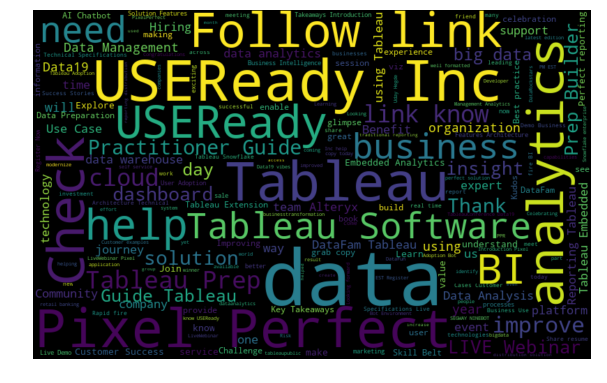

In [10]:
all_words = ' '.join([text for text in dfu['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

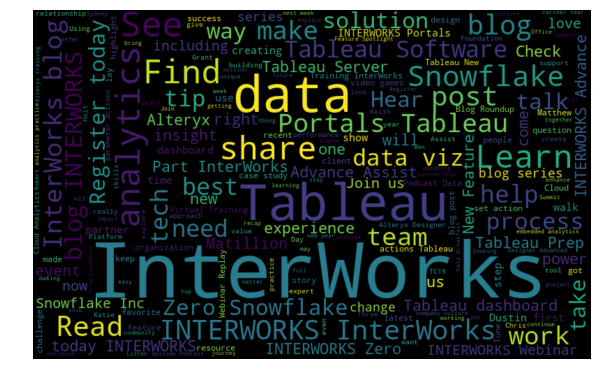

In [32]:
all_words = ' '.join([text for text in dfi['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

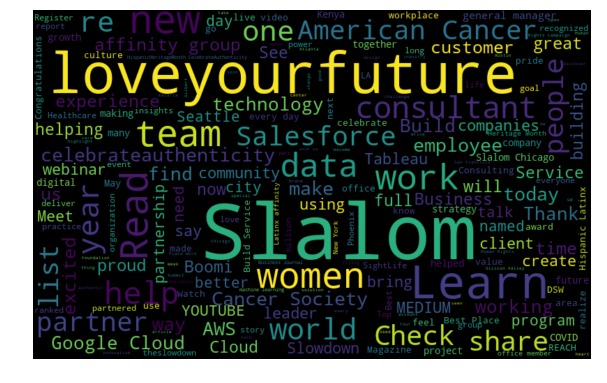

In [33]:
all_words = ' '.join([text for text in dfs['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
dfu['Date']=[pd.to_datetime(d) for d in dfu['Date']]
dft=dfu[(dfu['Date']<="31-1-2019") & (dfu['Date']>="1-1-2019")]
s=""
for i in range(len(dft)):
    s=s+df['Text'][i]+"\n"
s=s.lower()
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(s) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
news=[s.translate(str.maketrans('', '', '@#%,.;:-?!')) for s in filtered_sentence]
c= Counter(news)
most_occur =c.most_common(10)  
most_occur

C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[('', 6601),
 ('data', 554),
 ('tableau', 529),
 ('useready', 270),
 ('analytics', 231),
 ('�', 172),
 ('business', 158),
 ('bi', 134),
 ('inc', 122),
 ('perfect', 119)]

In [56]:
dfs['Date']=[pd.to_datetime(d) for d in dfs['Date']]
dft=dfs[(dfs['Date']<="31-1-2019") & (dfs['Date']>="1-1-2019")]
dft.reset_index(inplace=True,drop=True)
s=""
for i in range(len(dft)):
    s=s+dft['Text'][i]+"\n"
s=s.lower()
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(s) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
news=[s.translate(str.maketrans('', '', '@#%,.;:-?!\'')) for s in filtered_sentence]
c= Counter(news)
most_occur =c.most_common(10)  
most_occur

C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[('', 87),
 ('s', 9),
 ('year', 6),
 ('``', 6),
 ('2018', 6),
 ('slalom', 5),
 ('read', 5),
 ('2019', 5),
 ('time', 4),
 ('new', 4)]

In [4]:
df1=pd.read_csv("tweetf2019.csv",index_col=False)
df1.head()

,username,date,text,retweet,favorite,subjectivity,name
0,interworks,22-05-2020 23:00,"If you're adept at #Tableau, you've likely mas...",0,0,0.800,Interworks
1,InterWorksEU,22-05-2020 20:31,"Now on the blog, find out how to create custom...",0,0,0.500,Interworks
2,interworks,22-05-2020 20:00,We're thrilled to team up with our partners ov...,0,1,0.575,Interworks
3,InterWorksEU,22-05-2020 16:31,Now that @tableau and @salesforce have teamed ...,0,0,0.650,Interworks
4,DangerandDread,22-05-2020 15:59,If I explained the interworks of the world Del...,0,2,0.750,Interworks


In [5]:
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)
df=df.fillna("-")
for i in range(len(df)):
    df['Text'][i]=remove_urls(df['Text'][i])
df.head()

C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Name,Date,Text,Retweet,Favorite
0,tableau,01-06-2020 03:30,On the blog: May's Developer Program highlight...,3,12
1,tableau,31-05-2020 21:31,"We all have biases, but how are these inherent...",8,29
2,tableau,30-05-2020 22:31,Looking for weekend plans? We've got you cover...,13,36
3,tableau,30-05-2020 04:30,Hear from our partners about what it means to ...,1,9
4,tableau,30-05-2020 02:30,We're making eight updates to the data set on ...,3,16


In [7]:
dfu=df1[df1['name']=="USEReady"]
dfi=df1[df1['name']=="Interworks"]
dfs=df1[df1['name']=="Slalom"]
dfu.reset_index(inplace=True,drop=True)
dfi.reset_index(inplace=True,drop=True)
dfs.reset_index(inplace=True,drop=True)

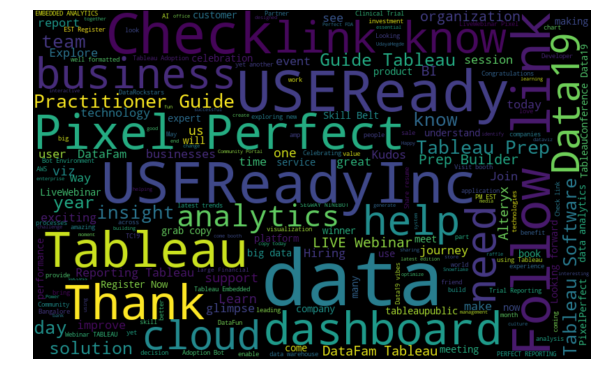

In [6]:
all_words = ' '.join([text for text in dfu['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

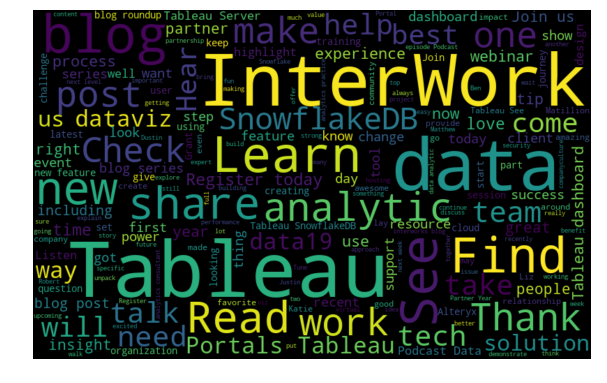

In [7]:
all_words = ' '.join([text for text in dfi['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

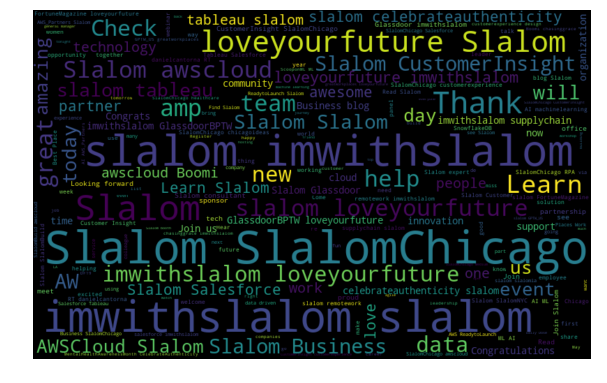

In [8]:
all_words = ' '.join([text for text in dfs['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
dfs['date']=[pd.to_datetime(d) for d in dfs['date']]
dft=dfs[(dfs['date']<="2019-01-31") & (dfs['date']>="2019-01-01")]
dft.reset_index(inplace=True,drop=True)
s=""
for i in range(len(dft)):
    s=s+dft['text'][i]+"\n"
s=s.lower()
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(s) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
news=[s.translate(str.maketrans('', '', '@#%,.;:-?!/\'')) for s in filtered_sentence]
c= Counter(news)
most_occur =c.most_common(20)  
most_occur

C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[('', 2999),
 ('slalom', 681),
 ('imwithslalom', 195),
 ('awscloud', 142),
 ('celebrateauthenticity', 91),
 ('boomi', 78),
 ('aws', 67),
 ('mentalhealthawarenessmonth', 55),
 ('tableau', 53),
 ('slalomchicago', 53),
 ('readytolaunch', 47),
 ('slalombuild', 46),
 ('business', 41),
 ('chattfilmfest', 39),
 ('loveyourfuture', 37),
 ('s', 36),
 ('new', 35),
 ('customerinsight', 33),
 ('’', 33),
 ('aapi', 32)]

In [22]:
df=pd.read_csv("Facebook_TAS.csv", index_col=False)
df.head()

,Text,Date,Likes,Comments,Shares,Name
0,We're making some changes to the #COVID19 data...,01-06-2020,19,0,0,Tableau
1,"""🆀: [Question] Listen to #KnowBeforeYouNoodle ...",29-05-2020,10,0,0,Tableau
2,"The pandemic is constantly evolving, and organ...",26-05-2020,10,0,0,Tableau
3,"""🆀: How are data relationship different from j...",22-05-2020,19,0,2,Tableau
4,"""Regardless of where organizations are in thei...",21-05-2020,14,0,0,Tableau


In [24]:
dft=df[df['Name']=="Tableau"]
dfa=df[df['Name']=="Alteryx"]
dft.reset_index(inplace=True,drop=True)
dfa.reset_index(inplace=True,drop=True)

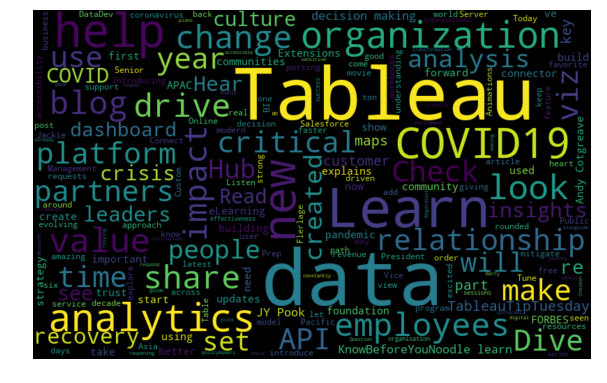

In [25]:
all_words = ' '.join([text for text in dft['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

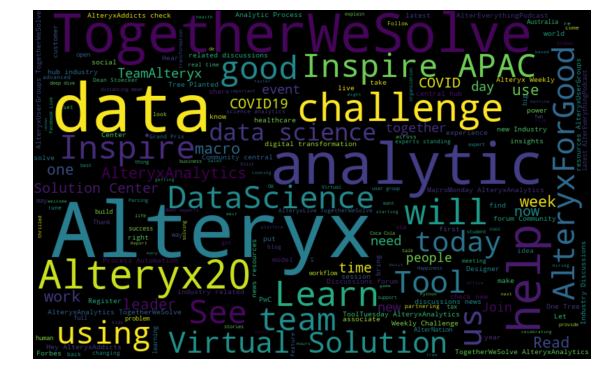

In [26]:
dfa=dfa.fillna("-")
all_words = ' '.join([text for text in dfa['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [2]:
df=pd.read_csv("Twitter_TAS.csv", index_col=False)
df.tail()

,Name,Date,Text,Retweet,Favorite
2479,tableau,14-01-2020 01:18,Great question! Students can acquire Tableau f...,0,1
2480,tableau,07-01-2020 20:52,Thanks for that information! Please try upgrad...,0,0
2481,tableau,04-01-2020 00:06,Thank you for that information. What version o...,0,0
2482,tableau,04-01-2020 00:02,Thanks for reaching out! I looked up your case...,0,0
2483,tableau,03-01-2020 23:56,Thanks for reaching out! The only promotion cu...,0,0


In [7]:
dft=df[df['Name']=="tableau"]
dfa=df[df['Name']=="alteryx"]
dfs=df[df['Name']=="SnowflakeDB"]
dft.reset_index(inplace=True,drop=True)
dfa.reset_index(inplace=True,drop=True)
dfs.reset_index(inplace=True,drop=True)

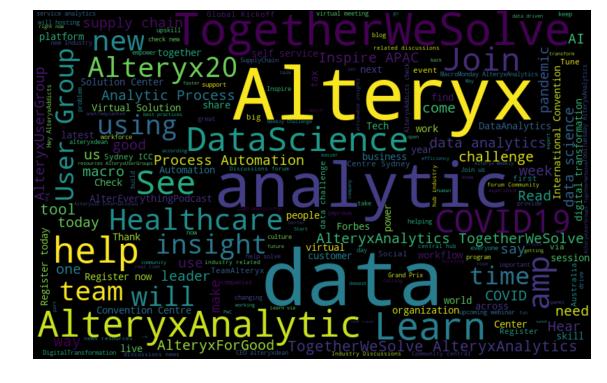

In [19]:
dfa=dfa.fillna("-")
all_words = ' '.join([text for text in dfa['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

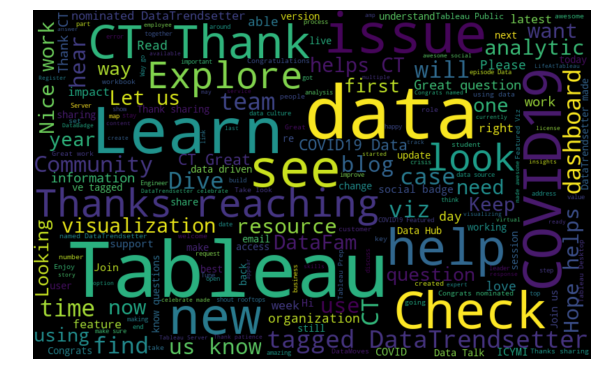

In [8]:
all_words = ' '.join([text for text in dft['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

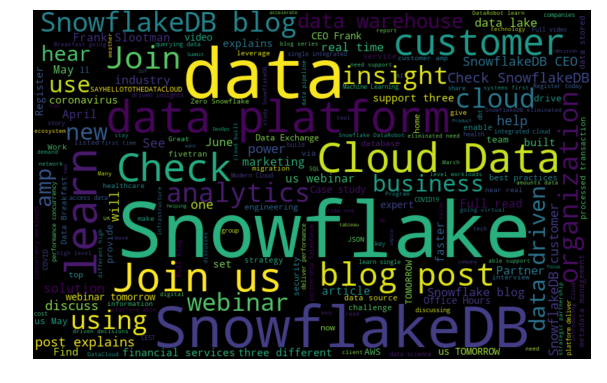

In [21]:
all_words = ' '.join([text for text in dfs['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()